### Load dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.metrics import (recall_score,accuracy_score, 
precision_score, confusion_matrix)
from sklearn.model_selection import train_test_split
import pickle, warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from tkinter import *
from tkinter import messagebox


C:\Users\tejra\AppData\Local\Temp\ipykernel_23504\268897121.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'sklearn'

### Load dataset

In [ ]:
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')


In [ ]:
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(1000, 2)

### Clean Data

In [ ]:
def clean(x):
    #to remove html tag
    x = re.sub(r'<.*?>',' ',x)
    x= re.sub(r"can't",'can not',x)
    x= re.sub(r"don't",'do not',x)
    x= re.sub(r"didn't",'did not',x)
    #change to mobile number
    x= re.sub(r'[\d-]{10,12}','mobno',x)
    #to remove punctuatin and numbers
    x = re.sub(r'[^A-Za-z]',' ',x)
    #to replace more than 1 space with 1 space
    x = re.sub(r'\s+',' ',x)
    #to convert into lower
    return x.lower()

clean("<h1>Hello there 9876576767 8787878787 I can't 9 eat this &^%H@#$%</h1>")

' hello there mobno mobno i can not eat this h '

In [ ]:
df['Review'] = df.Review.apply(clean)

In [ ]:
df.head(10)

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
5,now i am getting angry and i want my damn pho,0
6,honeslty it did not taste that fresh,0
7,the potatoes were like rubber and you could te...,0
8,the fries were great too,1
9,a great touch,1


### Split Data

In [ ]:
df.Liked.value_counts()
print(df.shape)

(1000, 2)


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df['Review'].values,df['Liked'].values,
                                            test_size=.20, random_state=10)

In [ ]:
print(xtrain.shape, xtest.shape, )

(800,) (200,)


### Count Vectorizer

In [ ]:
cv = CountVectorizer()
cv.fit(xtrain)

CountVectorizer()

In [ ]:
cv.get_feature_names()
print(len(cv.get_feature_names()))
cv_train = cv.transform(xtrain).toarray()
cv_test = cv.transform(xtest)
print(cv_train.shape)
print(cv_test.shape)

1763
(800, 1763)
(200, 1763)


C:\Users\tejra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cv_train[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Train Model

In [ ]:
nb = MultinomialNB(alpha=1)
lg = LogisticRegression()

In [ ]:
nb.fit(cv_train,ytrain)

MultinomialNB(alpha=1)

In [ ]:
lg.fit(cv_train,ytrain)

LogisticRegression()

### Prediction

In [ ]:
lg_pred = lg.predict(cv_test)
nb_pred = nb.predict(cv_test)

### Evaluation

In [ ]:
print("Logistic Regression")
print("Training Score: ",lg.score(cv_train,ytrain))
print("Testing Score: ",lg.score(cv_test,ytest))
print()
print("Confusion Matrix")
print(confusion_matrix(ytest,lg_pred))
print(precision_score(ytest, lg_pred))
print(recall_score(ytest, lg_pred))
print(accuracy_score(ytest, lg_pred))

Logistic Regression
Training Score:  0.98625
Testing Score:  0.825

Confusion Matrix
[[83 17]
 [18 82]]
0.8282828282828283
0.82
0.825


In [ ]:
print("Naive Bayes")
print("Training Score: ",nb.score(cv_train,ytrain))
print("Testing Score: ",nb.score(cv_test,ytest))
print("Confusion Matrix")
print(confusion_matrix(ytest,nb_pred))
accuracy_score(ytest,nb_pred)

Naive Bayes
Training Score:  0.95625
Testing Score:  0.795
Confusion Matrix
[[85 15]
 [26 74]]


0.795

In [ ]:
score1 = accuracy_score(ytest,nb_pred)
score2 = precision_score(ytest,nb_pred)
score3= recall_score(ytest,nb_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))



Accuracy is  79.5 %
Precision is  0.83
Recall is  0.74


### Find best value for alpha

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold

In [ ]:
p = {'alpha':[100,10,1,.1,.01,.001,.0001]}
kf = KFold(5,shuffle=True)

In [ ]:
gd = GridSearchCV(MultinomialNB(),param_grid=p,cv=kf,scoring='accuracy')
gd.fit(cv_train,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [ ]:
gd.best_params_

{'alpha': 1}

### Visualization

<AxesSubplot:ylabel='Density'>

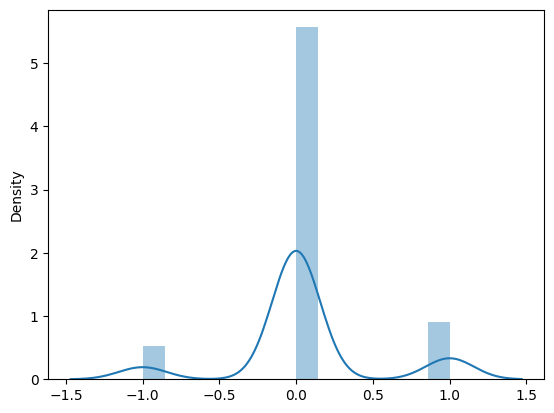

In [ ]:
warnings.filterwarnings("ignore")
sb.distplot((ytest-nb_pred))

### Let's Check

In [ ]:
r = np.array(["Worst Experience ever","I must say it fabulus","Horrible! Don't ever visit again",
             "I hate this","I love this food","amazing food"])
cvr = cv.transform(r)
print(cvr.shape)
naive=nb.predict(cvr)
logistic=lg.predict(cvr)
mydf = pd.DataFrame({"Comment":r,"Naive Prediction":naive,"Logistic's Prediction":logistic})
mydf

(6, 1763)


,Comment,Naive Prediction,Logistic's Prediction
0,Worst Experience ever,0,0
1,I must say it fabulus,0,1
2,Horrible! Don't ever visit again,0,0
3,I hate this,0,0
4,I love this food,1,1
5,amazing food,1,1


### Export file to pkl

In [ ]:
filename="review_model_log.pkl"
file = open(filename,"wb")
pickle.dump(lg,file)
file.close()

In [ ]:
fl = open("review_model_log.pkl","rb")
c = pickle.load(fl)
c

LogisticRegression()

In [ ]:
countvector = "review_cv.pkl"
cfile = open(countvector,"wb")
pickle.dump(cv,cfile)
file.close()

In [ ]:
cfl = open("review_cv.pkl","rb")
cv=pickle.load(cfl)
cv

CountVectorizer()

### create GUI

In [ ]:
def get_pred():
    rv = lb.get("1.0",END)
    tst = cv.transform([rv])
    rs = c.predict(tst)
    label ={0:"Customer is not satisfied 😞",1:"Customer is saisfied 😊"}
    dd = label[rs[0]]
    lbl1.config(text=dd,fg="green")
    messagebox.showinfo("Result",dd)
main = Tk()
main.title("SENTIMENT ANALYSIS ON FOOD REVIEWS")
lbl= Label(text="SENTIMENT ANALYSIS",fg="red",bg="white",font=("georgia",20))
lbl.pack()

lbl1= Label(bg="white",font=("georgia",20))
lbl1.pack()

lb = Text(main,)
lb.pack(pady=3)

btn = Button(main,bg="green",fg="white",text="Check",height=5,command=get_pred)
btn.pack(fill="x",pady=3)
main.mainloop()